In [1]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

(array([996.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.000000e+00, 1.572090e+04, 3.144080e+04, 4.716070e+04,
        6.288060e+04, 7.860050e+04, 9.432040e+04, 1.100403e+05,
        1.257602e+05, 1.414801e+05, 1.572000e+05]),
 <BarContainer object of 10 artists>)

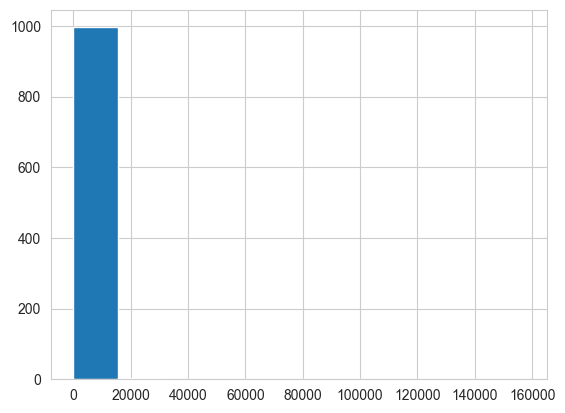

In [2]:
rng = np.random.default_rng(1000)

a = 1.5
n = 1000
s = rng.zipf(a, n)

plt.hist(s, bins=10)

In [3]:
from sqlalchemy import create_engine

db = "../../data/sqlite.db"

engine = create_engine(f"sqlite:///{db}", echo=True)

2023-11-28 16:20:32,894 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-28 16:20:32,894 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("
    SELECT
    empire_id,
    count(planet_id) as num_habitable_planets
    FROM empire
    LEFT JOIN star_system ON empire_id = empire_owner
    LEFT JOIN main.planet p on star_system.star_system_id = p.planet_star_system
    LEFT JOIN main.biome b on p.planet_biome = b.biome_id
    WHERE b.biome_is_habitable = true
    GROUP BY empire_id
    ORDER BY num_habitable_planets DESC;
    ")
2023-11-28 16:20:32,894 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-11-28 16:20:32,895 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("
    SELECT
    empire_id,
    count(planet_id) as num_habitable_planets
    FROM empire
    LEFT JOIN star_system ON empire_id = empire_owner
    LEFT JOIN main.planet p on star_system.star_system_id = p.planet_star_system
    LEFT JOIN main.biome b on p.planet_biome = b.biome_id
    WHERE b.biome_is_habitable = 

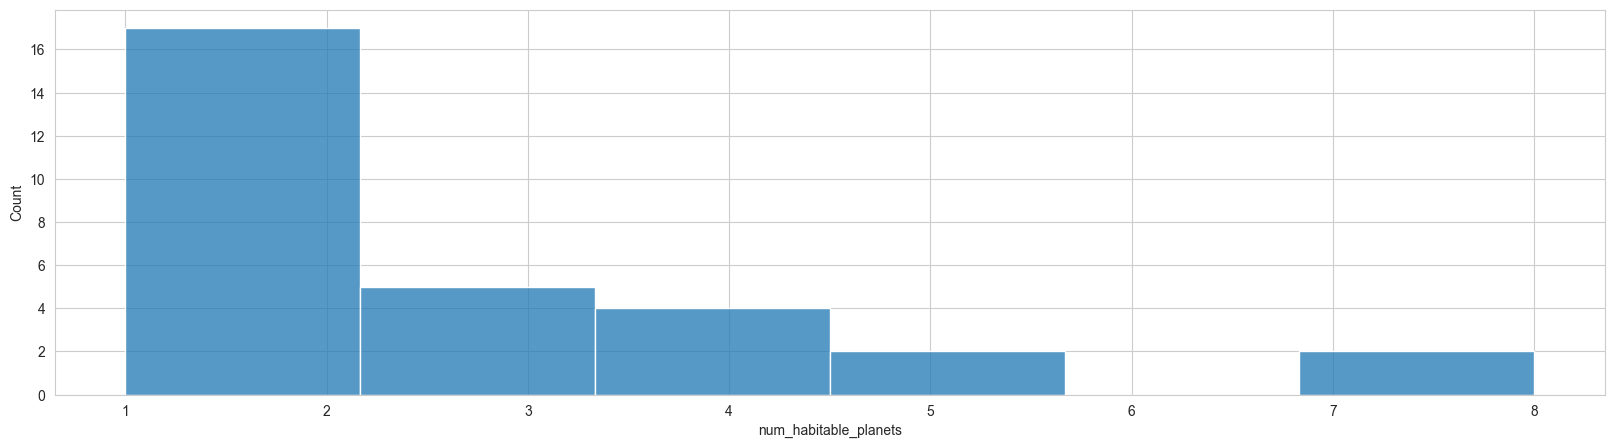

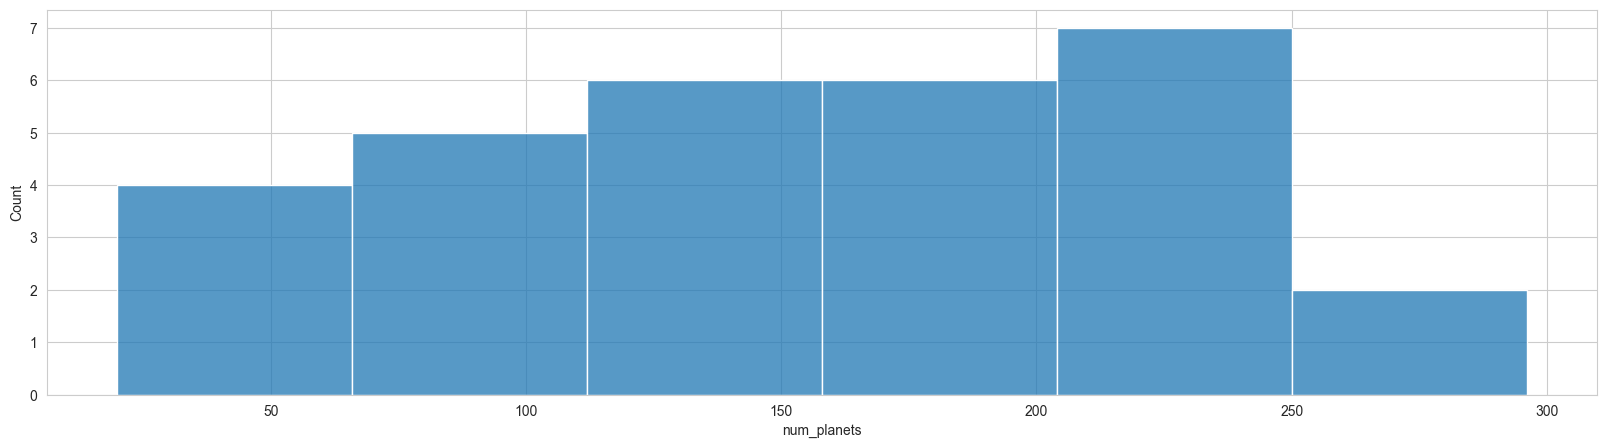

In [4]:
from src.models import Empire, StarSystem, Planet, Biome
from sqlalchemy import select, func


# plot empire id and number of habitable planets

def plot_empire_num_habitable_planets():
    stmt = """
    SELECT
    empire_id,
    count(planet_id) as num_habitable_planets
    FROM empire
    LEFT JOIN star_system ON empire_id = empire_owner
    LEFT JOIN main.planet p on star_system.star_system_id = p.planet_star_system
    LEFT JOIN main.biome b on p.planet_biome = b.biome_id
    WHERE b.biome_is_habitable = true
    GROUP BY empire_id
    ORDER BY num_habitable_planets DESC;
    """
    df = pd.read_sql(stmt, engine)

    # plot
    plt.figure(figsize=(20, 5))
    # sns.barplot(x="empire_id", y="num_habitable_planets", data=df)

    sns.histplot(x="num_habitable_planets", data=df)


def plot_empire_num_planets():
    stmt = """
    SELECT
    empire_id,
    count(planet_id) as num_planets
    FROM empire
    LEFT JOIN star_system ON empire_id = empire_owner
    LEFT JOIN main.planet p on star_system.star_system_id = p.planet_star_system
    GROUP BY empire_id
    ORDER BY num_planets DESC;
    """
    df = pd.read_sql(stmt, engine)

    # plot
    plt.figure(figsize=(20, 5))
    sns.histplot(x="num_planets", data=df)


plot_empire_num_habitable_planets()
plot_empire_num_planets()

In [5]:
from src.factories.planet_resources import add_empire_resources
from src.factories.empires_util import empires_info

empires = empires_info(engine)
add_empire_resources(empires, engine)

empires.head()

ModuleNotFoundError: No module named 'src.factories.empires_util'

In [6]:
pd.cut(empires["total_energy"], bins=10, labels=range(1, 11)).astype(
    int
) + pd.cut(
    empires["total_minerals"], bins=10, labels=range(1, 11)
).astype(int) + pd.cut(
    empires["total_research"],
    bins=10,
    labels=range(1, 11)
).astype(int)

NameError: name 'empires' is not defined

In [15]:
capital_a = ord("A")
capital_z = ord("Z")

[
    "".join([chr(c) for c in row])
    for row in rng.integers(capital_a, capital_z + 1, size=(10, 3))
]

# [chr(rng.integers(capital_a, capital_z + 1)) for _ in range(3)]

['AQR', 'THG', 'YYK', 'LES', 'QPT', 'IKP', 'EXR', 'VXA', 'VSY', 'DKO']

In [7]:
from faker import Faker
import datetime

fake = Faker()

start_year = datetime.datetime(2200, 1, 1)
end_year = datetime.datetime(2300, 1, 1)

fake.date_between(start_year, end_year)

datetime.date(2252, 12, 15)

In [13]:
# get num years
int((end_year - start_year).days / 365)

100